<a href="https://colab.research.google.com/github/Drobilk/LAB-SEMESTR-2/blob/main/%D0%9A%D0%B0%D1%85%D1%83%D0%B4%D0%B6%D0%B8_%D0%9B%D0%B0%D0%B1%D0%B0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_Indian_films'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[10]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             10 non-null     int64 
 1   Film             10 non-null     object
 2   Year             10 non-null     int64 
 3   Director         10 non-null     object
 4   Studio(s)        10 non-null     object
 5   Worldwide gross  10 non-null     object
 6   Source           10 non-null     object
dtypes: int64(2), object(5)
memory usage: 688.0+ bytes


In [ ]:
df.head()

,Rank,Film,Year,Director,Studio(s),Worldwide gross,Source
0,1,Dangal,2016,Nitesh Tiwari,Aamir Khan Productions UTV Motion Pictures Wal...,"₹2,024 crore (US$311 million)",[9]
1,2,Bajrangi Bhaijaan,2015,Kabir Khan,Salman Khan Films Kabir Khan Films Eros Intern...,₹969.06 crore (US$150 million),[n 1]
2,3,Secret Superstar,2017,Advait Chandan,Aamir Khan Productions,₹966.86 crore (US$154 million),[n 2]
3,4,PK,2014,Rajkumar Hirani,Vinod Chopra Films Rajkumar Hirani Films,₹832 crore (US$140 million),[20][10]
4,5,Sultan,2016,Ali Abbas Zafar,Yash Raj Films,₹623.33 crore (US$89 million),[25]


In [ ]:
Y=df['Year']

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
print('mean=%.3f std=%.3f' % (mean(Y), std(Y)))

mean=2016.400 std=1.855


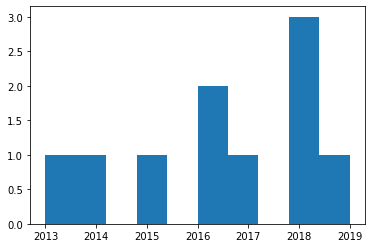

In [ ]:
pyplot.hist(Y)
pyplot.show()

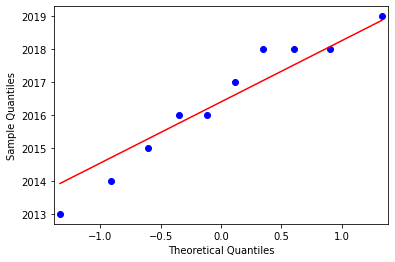

In [ ]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot

qqplot(Y, line='s')
pyplot.show()

тест Шапиро-Вилка

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(Y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not Gaussian (reject H0)')

Statistics=0.940, p=0.554
Sample looks Gaussian (fail to reject H0)


тест д'Агостино на К^2

In [ ]:
from scipy.stats import normaltest

stat, p = normaltest(Y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not Gaussian (reject H0)')


Statistics=0.817, p=0.665
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


тест Андерсона-Дарлинга





In [ ]:
from scipy.stats import anderson

result = anderson(Y)
print('Statistics: %.3f' % result.statistic)
p=0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl,cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl,cv))


Statistics: 0.306
15.000: 0.501, data looks normal (fail to reject H0)
10.000: 0.570, data looks normal (fail to reject H0)
5.000: 0.684, data looks normal (fail to reject H0)
2.500: 0.798, data looks normal (fail to reject H0)
1.000: 0.950, data looks normal (fail to reject H0)


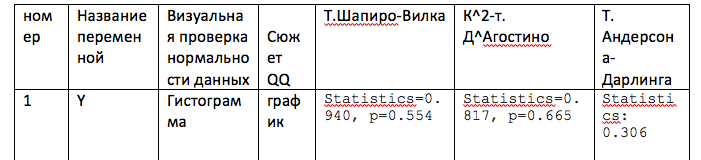